<a href="https://colab.research.google.com/github/ArjunBhaybhang/Public-Projects/blob/main/Healthcare%20Projects/1%20Stroke%20Prediction%20using%20SVM%20with%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stroke prediction using Support Vector Machine with extensive Exploratory Data Analysis
    


*In this project, we will predict whether a patient will have a heart stroke or not based on his/her comorbidities, work, and lifestyle*




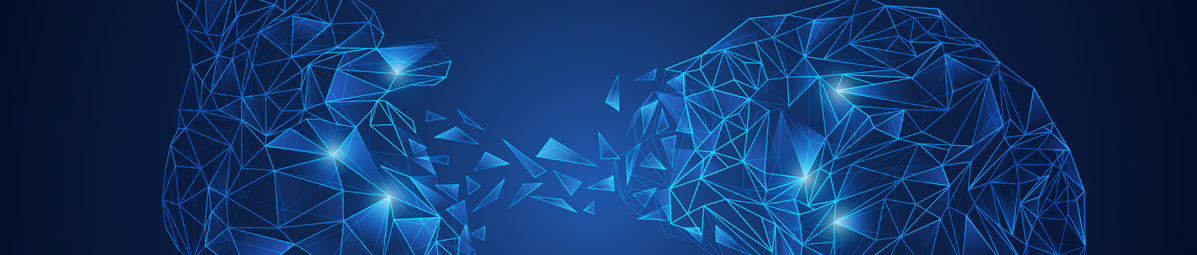

## Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.



# Imports

In [1]:
%load_ext google.colab.data_table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Load Data

In [2]:
df_w = pd.read_csv('/content/drive/MyDrive/DATA Projects/Healthcare Projects/Healthcare Project 1 Stroke Prediction/healthcare-dataset-stroke-data.csv')
df = df_w.drop('id',axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The dataset consists of 5110 instances with following features with target being stroke (To be predicted by our model)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


As we can see above, all columns except one ('bmi') have all non-null values. The 'bmi column will have to go some processing so it consists of no non-null entries

In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


We can observe the mean, median, and quartile values from the above table. This also lets us see the range of values we will be dealing with and spot any anomaly if any.

# Data Cleaning

In [5]:
# Replacing missing NA values in 'bmi' with their mean bmi of their gender

F_missing_bmi_index = df[(df.gender == 'Female') & (df.bmi.isna())].index
df.loc[F_missing_bmi_index, 'bmi'] = 29

M_missing_bmi_index = df[(df.gender == 'Male') & (df.bmi.isna())].index
df.loc[M_missing_bmi_index, 'bmi'] = 28

In [6]:
# Removing the one instance where gender is 'Other' 

other_index = df[df['gender'] =='Other'].index
df = df.drop(other_index)

# Visualizing features

### Let's visualize some features of the data to better understand it, this often reveals some interesting aspects of data.

Does smoking, work type, choice of residence have any relation with stroke probability? Lets find out.

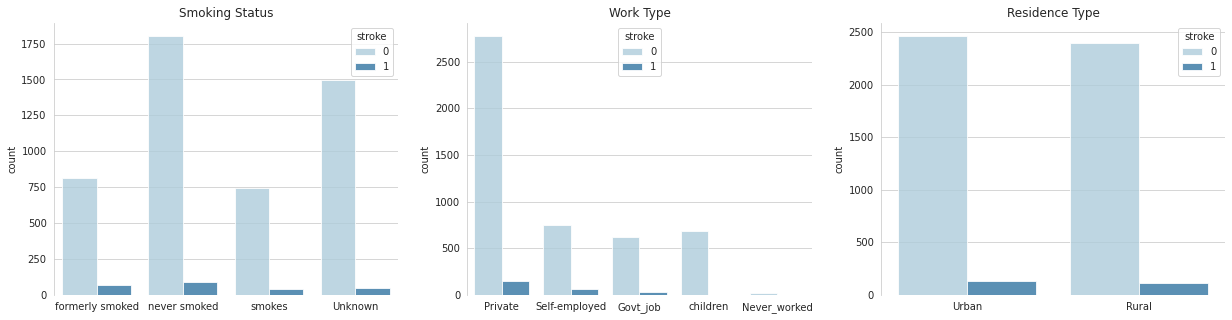

In [7]:
#@title Code
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=df['smoking_status'], alpha=0.8, palette="Paired",hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Smoking Status');

plt.subplot(1,3,2)
sns.countplot(x=df['work_type'], alpha=0.8, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Work Type');

plt.subplot(1,3,3)
sns.countplot(x=df['Residence_type'], alpha=0.8, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Residence Type');


From the plots above it looks like there isnt any significant relation between stroke probability and the features

### lets see if Factors like gender, hypertension and any history of heart diseases effect the stroke probability

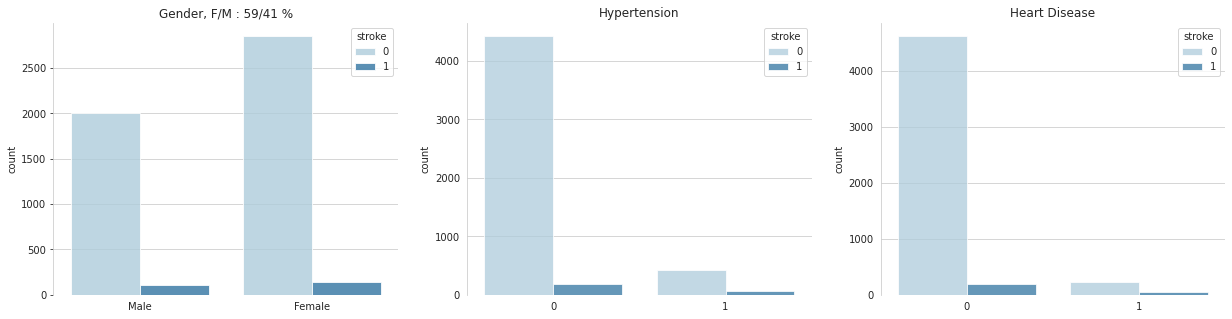

In [8]:
#@title Code
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=df['gender'], alpha=0.8, palette="Paired", hue=df['stroke']);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender, F/M : 59/41 %');

plt.subplot(1,3,2)
sns.countplot(x=df['hypertension'], alpha=0.75, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hypertension');

plt.subplot(1,3,3)
sns.countplot(x=df['heart_disease'], alpha=0.75, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Heart Disease');

Considering the proportion between the bars there seems to be some sort of relation between some features and stroke probability

## Finally lets look at Age, Average Glucose Level, BMI to spot for any corelation

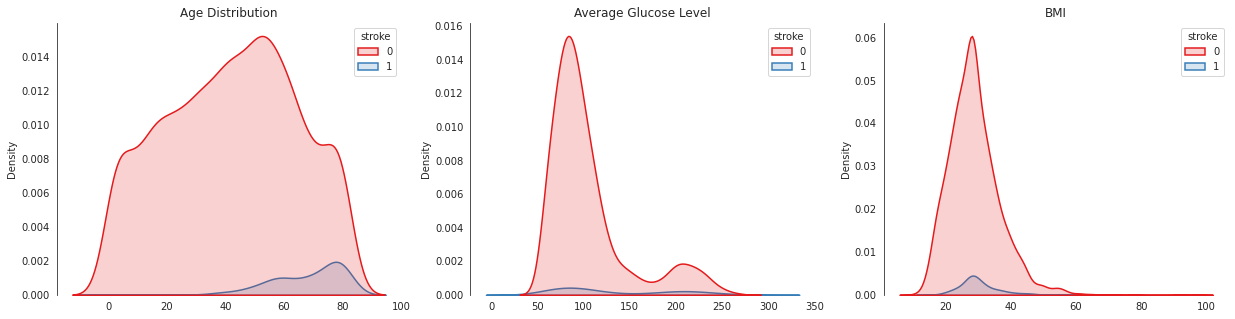

In [9]:
#@title Code
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x=df['age'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age Distribution');

plt.subplot(1,3,2)
sns.kdeplot(x=df['avg_glucose_level'], alpha=0.2, palette="Set1", label='avg_glucose_level',linewidth=1.5, fill=True, hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Average Glucose Level');

plt.subplot(1,3,3)
sns.kdeplot(x=df['bmi'], alpha=0.2, palette="Set1", label='BMI',shade=True, linewidth=1.5, fill=True, hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('BMI');

It looks like there is a strong relation between these factors and stroke probability. Lets look at a these factors more closely by fitting a regression line through the distribution

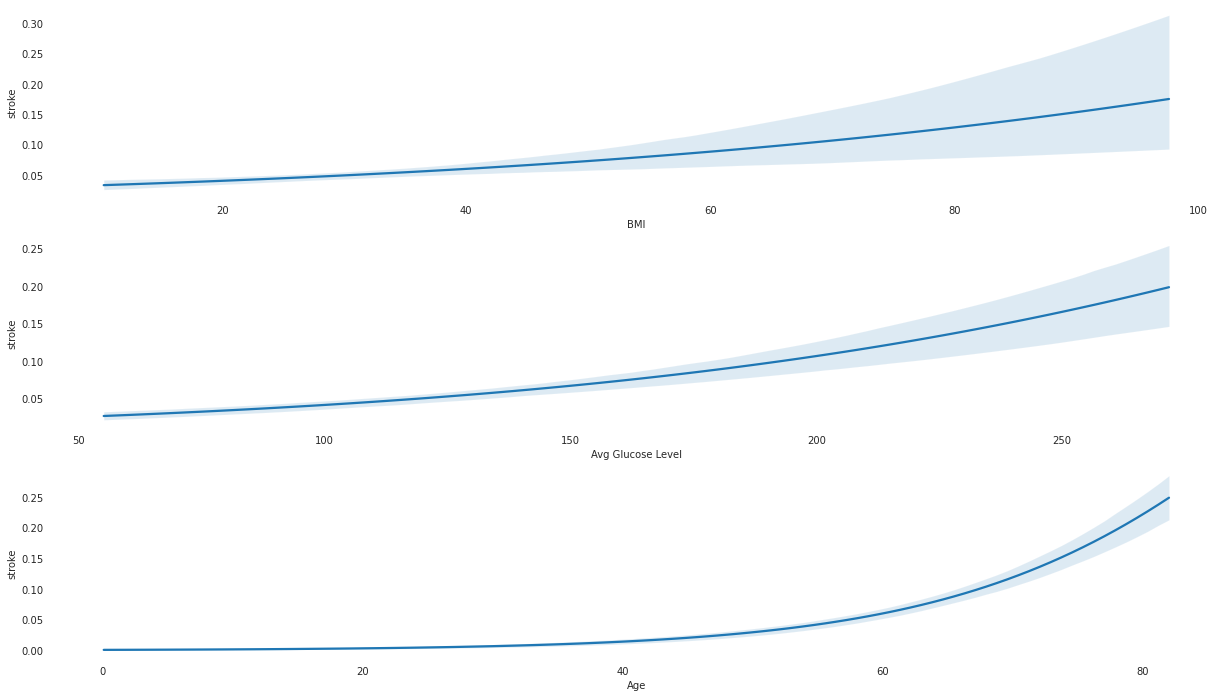

In [10]:
#@title Code
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,12));

plt.subplot(3,1,1)
sns.regplot(x=df['bmi'], y=df['stroke'], scatter=False, logistic=True, label= 'BMI');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('BMI');

plt.subplot(3,1,2)
sns.regplot(x=df['avg_glucose_level'], y=df['stroke'], scatter=False, logistic=True, label='Avg Glucose Level');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Avg Glucose Level');

plt.subplot(3,1,3)
sns.regplot(x=df['age'], y=df['stroke'], scatter=False, logistic=True, label='Age');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Age');

Age seems to be a dominating factor here, the plots tell that chances for stroke increase as age increases. Glucose level and BMI also seem to have a positive corelation with the stroke probability. These factors will contribue greatly towards predicting the stroke probability.

In [11]:
# checking imbalances in class {1: stroke, 0:no stroke}
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

Our data appears imbalanced, this could make it difficult for our model to perform with desired score. We can fix this by oversampling later.

# Preprocessing Data

In [12]:
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
df['ever_married'] = df['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}).astype(np.uint8)

# We will be using following features to train our model :


1.  Gender: "Male", "Female"
2.  Age: age of the patient
3. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4. Deart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
5. Ever married: "No" or "Yes"
6. Work type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
7. Residence_type: "Rural" or "Urban"
8. Avg_glucose_level: average glucose level in blood
9. BMI: body mass index
10. Smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*







In [13]:
# Defining features and target

X = df.drop('stroke', axis=1)
y = df.pop('stroke')

# We will ve using SVM classifier for this problem 

### Other classifiers that I tried (Logestic regression, Random Forest) also performed good, but not as good as SVM

### Lets set up our pipeline. I will be scaling data before feeding it to classifier. SVM model do perform better after scaling.

In [26]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42, probability=True))])

### Spliting our data into training and test sets.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y)

In [38]:
# Our data is biased, we can fix this with SMOTE

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

I have used ten-fold cross-validation, so we don't settle at local minima. Let us use the F1 score as a metric for our model for now. we will look at more metrics later

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv.mean()

0.9037111932889692

# Model Evaluation

### Lets look at the confusion matrix, this better describes the performance of our classification model.

In [40]:
from sklearn.metrics import confusion_matrix

svm_pipeline.fit(X_train_resh,y_train_resh);
svm_train_predict = svm_pipeline.predict(X_train)
svm_pred = svm_pipeline.predict(X_test)
svm_cm = confusion_matrix(y_train,svm_train_predict)
svm_cm

array([[3363,  285],
       [  71,  112]])

Auc :  0.7396552155215522


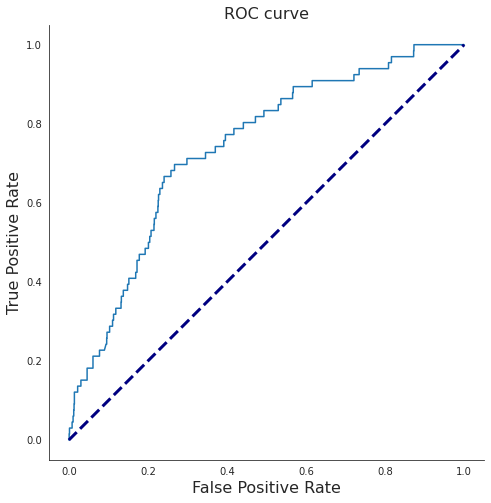

In [41]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, svm_pipeline.predict_proba(X_test)[:,1])

plt.figure(figsize=(12,8));

plt.plot(fpr_lr, tpr_lr);
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
plt.title('ROC curve', fontsize=16);
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--');
plt.axes().set_aspect('equal');
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False);

print('Auc : ', auc(fpr_lr, tpr_lr))



In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
print(classification_report(y_test, svm_pred))

print('Accuracy Score: ',accuracy_score(y_test,svm_pred))
print('F1 Score: ',f1_score(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1212
           1       0.12      0.24      0.16        66

    accuracy                           0.87      1278
   macro avg       0.54      0.57      0.55      1278
weighted avg       0.91      0.87      0.89      1278

Accuracy Score:  0.8716744913928013
F1 Score:  0.163265306122449


# Prediction Explaination using SHAP

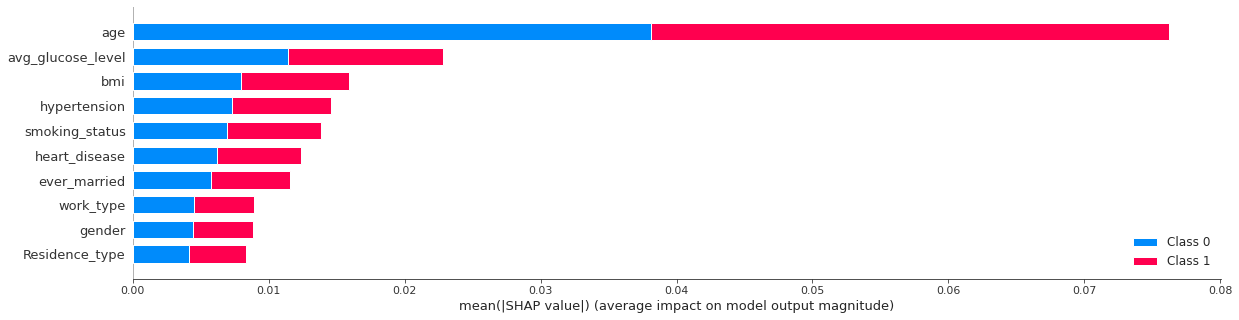

In [103]:
# pip install shap
import shap
from sklearn.ensemble import RandomForestClassifier         # using random forest to explain for ease
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X_train, y_train)

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, plot_size=(19.5,5), alpha=0.2)

The plot above shows the features used in predicting the stroke probability. Age appears to be on top which has high corelation with the Stroke probability, followed by Average glucose level and BMI